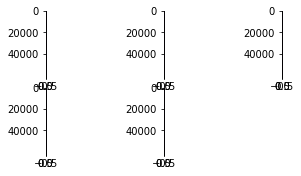

In [1]:
#loading necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#loading training and test data
train_data=pd.read_csv("mnist_train.csv", header=None)
test_data=pd.read_csv("mnist_test.csv", header=None)

#modifying loaded data to desired form
y_desired=train_data.iloc[:, [0]]
x_train=train_data.iloc[:, 1: ]/255
y_test=test_data.iloc[:, [0]]
x_test=test_data.iloc[:, 1:]/255

for i in range(1,6):
    plt.subplot(3,3,i)
    plt.imshow(np.array(x_train)[:, [i]])

In [2]:
m_train=x_train.shape[0]
m_test=x_test.shape[0]
n=x_train.shape[1]

y_train = np.zeros((m_train, 10))
for i in range (0, m_train):
    y_train[i][y_desired.iloc[i]]=1.0
y_testt= np.zeros((m_test, 10))
for i in range (0, m_test):
    y_testt[i][y_test.iloc[i]]=1.0    

In [3]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s
def layer_sizes(X, Y):
    n_x = X.shape[1] 
    n_h = 64
    n_y = Y.shape[1] 
    
    return (n_x, n_h, n_y)


def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((1,n_h))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((1, n_y))
    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
    return parameters

In [4]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    #propagate_forwrd
    Z1 = np.dot(X, W1.T)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(A1, W2.T)+b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [5]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[0]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    logprobs = np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),(1-Y))
    cost = (-1/m)*np.sum(logprobs)+(1/m)
    return cost

In [6]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    #backprop
    dZ2 = A2-Y
    dW2 = (1/m)*np.dot(dZ2.T, A1)
    db2 = (1/m)*np.sum(dZ2, axis=0, keepdims=True)
    dZ1 = np.dot(dZ2, W2)*(1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1.T, X)
    db1 = (1/m)*np.sum(dZ1, axis=0,keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [7]:
def update_parameters(parameters, grads, learning_rate):

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [8]:
def nn_model(X, Y, n_h, num_iterations, print_cost=False):
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    m = X.shape[0]
    parameters = initialize_parameters(n_x,n_h,n_y)
    
    #gradient descent
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function
        cost = compute_cost(A2, Y, parameters)
 
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
 
        # parameter update
        parameters = update_parameters(parameters, grads, learning_rate = 0.01)
        
        if print_cost and i % 20 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters


In [9]:
def predict(parameters, X):
    
    A2, cache = forward_propagation(X, parameters)
    predictions = A2>0.5
    
    return predictions

In [10]:
parameters = nn_model(x_train, y_train, n_h = 64, num_iterations =300 , print_cost=True)
predictions_train = predict(parameters, x_train)
predictions_test=predict(parameters, x_test)

print("train accuracy: {} %".format(100 - np.mean(np.abs(predictions_train-y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(predictions_test-y_testt)) * 100))

Cost after iteration 0: 6.926005
Cost after iteration 20: 3.144813
Cost after iteration 40: 1.328105
Cost after iteration 60: 0.890047
Cost after iteration 80: 0.792179
Cost after iteration 100: 0.626328
Cost after iteration 120: 0.572862
Cost after iteration 140: 0.537723
Cost after iteration 160: 0.510102
Cost after iteration 180: 0.487222
Cost after iteration 200: 0.467688
Cost after iteration 220: 0.450678
Cost after iteration 240: 0.435651
Cost after iteration 260: 0.422226
Cost after iteration 280: 0.410114
train accuracy: 98.765 %
test accuracy: 98.803 %
